# Capstone Model Training

## Data Preprocessing

## Data Visualization

In [80]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Set up visualization style
sns.set(style="whitegrid")

In [81]:
# Load the dataset
df = pd.read_csv('cybersecurity_intrusion_data.csv')

# Display the first few rows
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


## Exploratory Data Analysis

In [82]:
df = df.drop('session_id', axis=1)

In [83]:
# Check for missing values
df.isnull().sum()

network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [84]:
# Summary statistics for numerical features
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


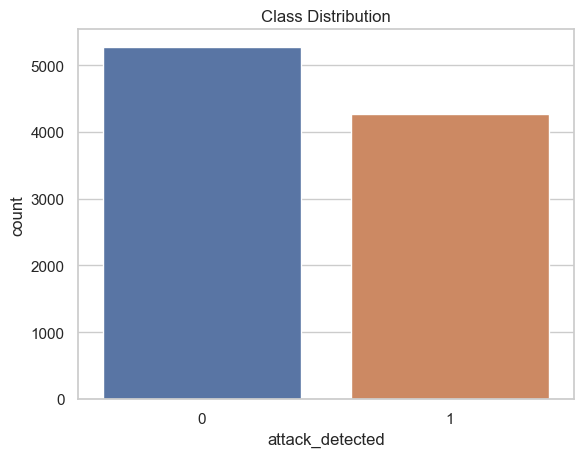

In [85]:
# Class distribution
df['attack_detected'].value_counts()

# Visualize class distribution
sns.countplot(x='attack_detected', data=df)
plt.title('Class Distribution')
plt.show()

## Data Preprocessing

In [86]:
# Check for missing values again
df.isnull().sum()

# If there are missing values, impute them
# For numerical features, use mean or median
# For categorical features, use mode
numerical_features = ['network_packet_size', 'session_duration', 'ip_reputation_score']
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']

# Impute missing values
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

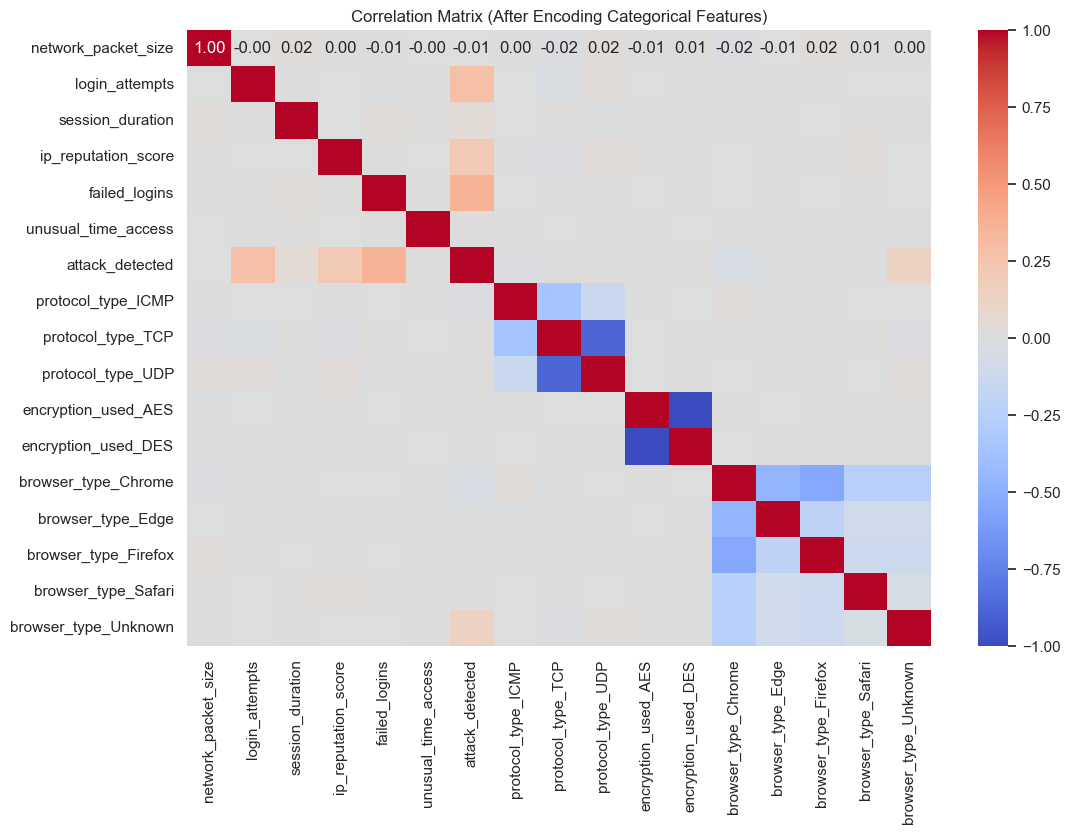

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_ICMP,protocol_type_TCP,protocol_type_UDP,encryption_used_AES,encryption_used_DES,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,599,4,492.983263,0.606818,1,0,1,False,True,False,False,True,False,True,False,False,False
1,472,3,1557.996461,0.301569,0,0,0,False,True,False,False,True,False,False,True,False,False
2,629,3,75.044262,0.739164,2,0,1,False,True,False,False,True,True,False,False,False,False
3,804,4,601.248835,0.123267,0,0,1,False,False,True,False,True,False,False,False,False,True
4,453,5,532.540888,0.054874,1,0,0,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,194,3,226.049889,0.517737,3,0,1,True,False,False,True,False,True,False,False,False,False
9533,380,3,182.848475,0.408485,0,0,0,False,True,False,True,False,True,False,False,False,False
9534,664,5,35.170248,0.359200,1,0,0,False,True,False,True,False,False,False,True,False,False
9535,406,4,86.664703,0.537417,1,1,0,False,True,False,True,False,True,False,False,False,False


In [87]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=False)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (After Encoding Categorical Features)')
plt.show()

df_encoded

In [88]:
# Split into features and target
X = df.drop('attack_detected', axis=1)
y = df['attack_detected']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7629, 9) (7629,)
Testing set shape: (1908, 9) (1908,)


## Feature Selection and Engineering

### Pairplots

c:\Users\adenu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adenu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adenu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adenu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

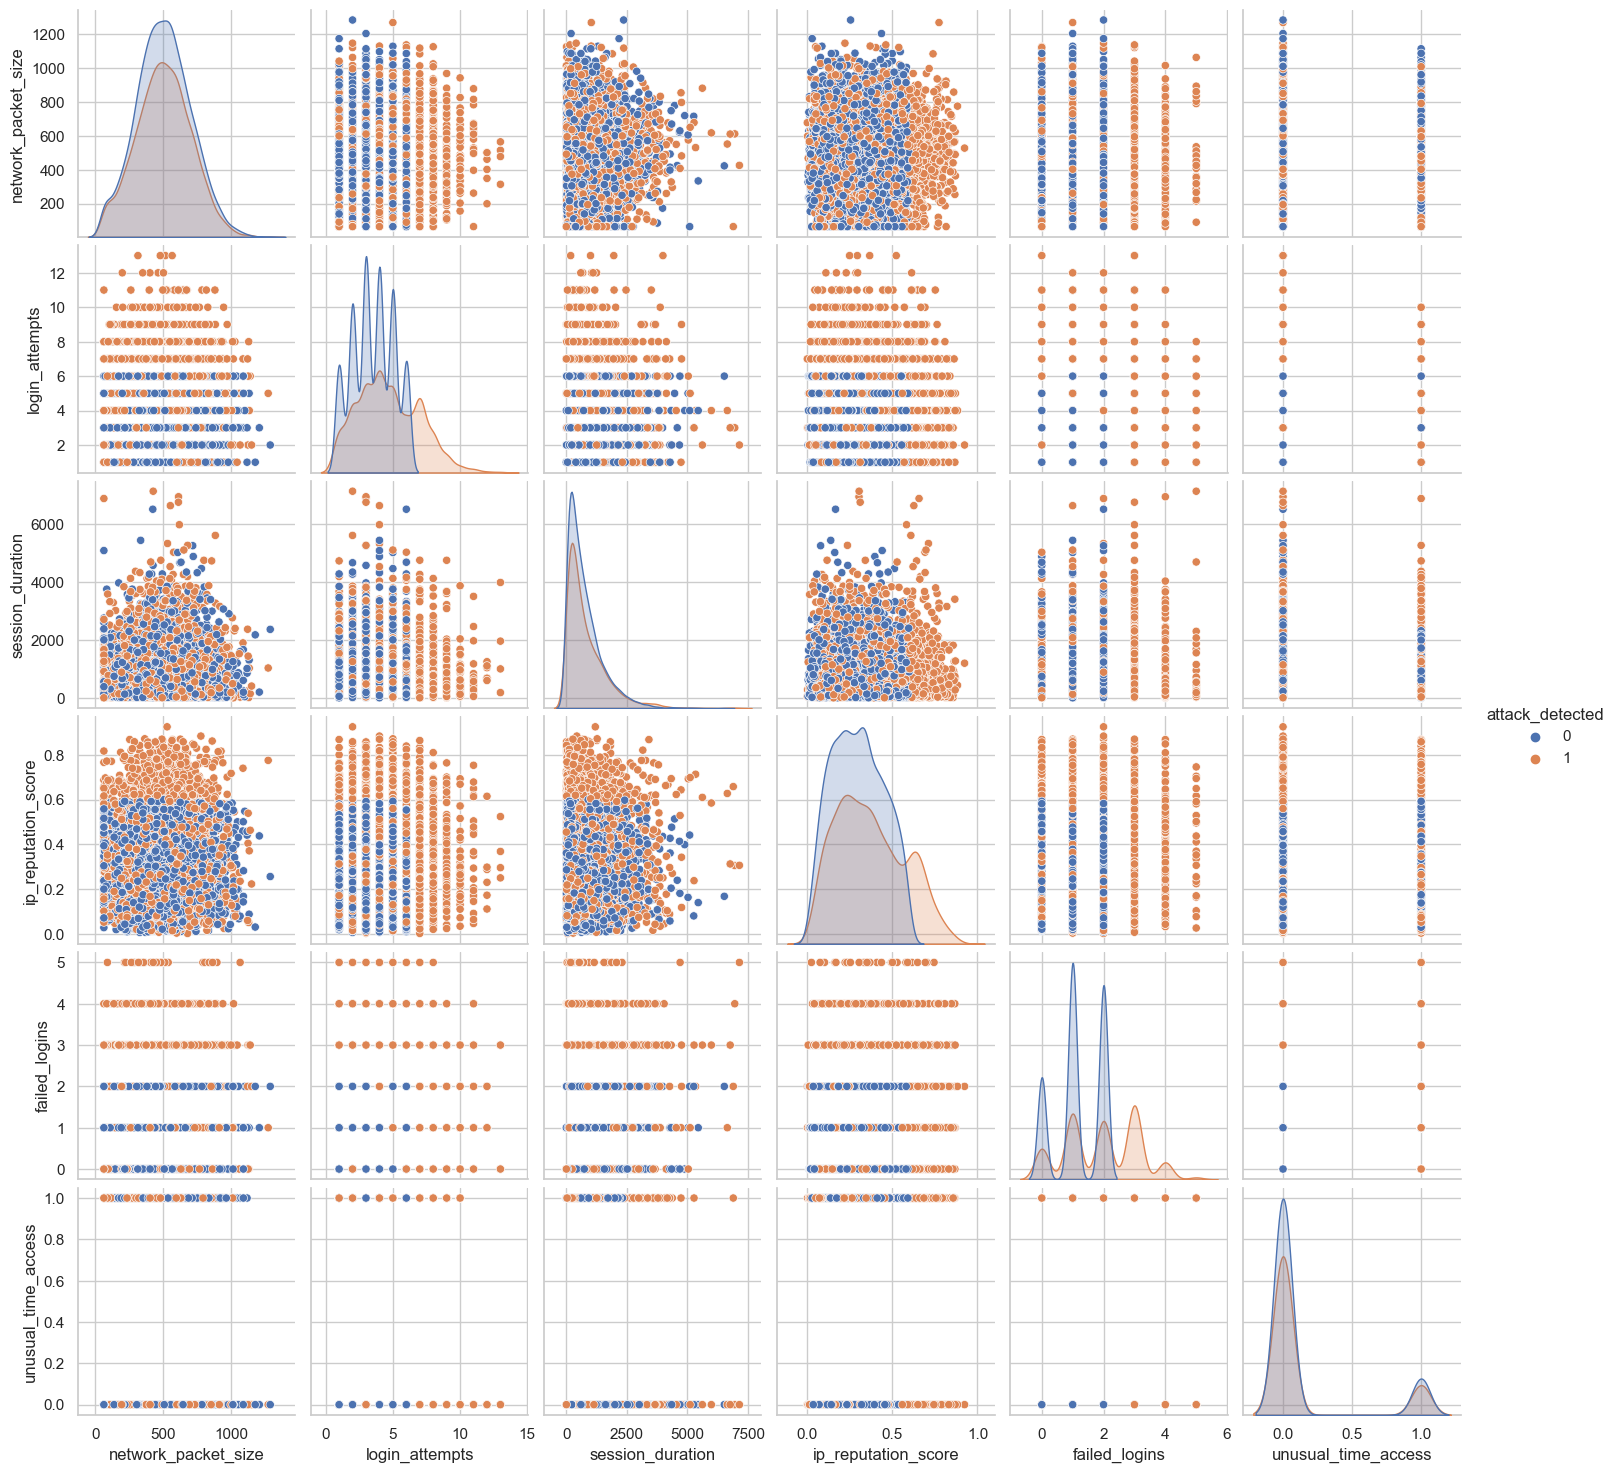

In [89]:
# Add the target variable to the DataFrame
df_pairplot = X_train.copy()
df_pairplot['attack_detected'] = y_train

# Plot pairplot
sns.pairplot(df_pairplot, hue='attack_detected', diag_kind='kde')
plt.show()

### Feature Importance and Mutual Information

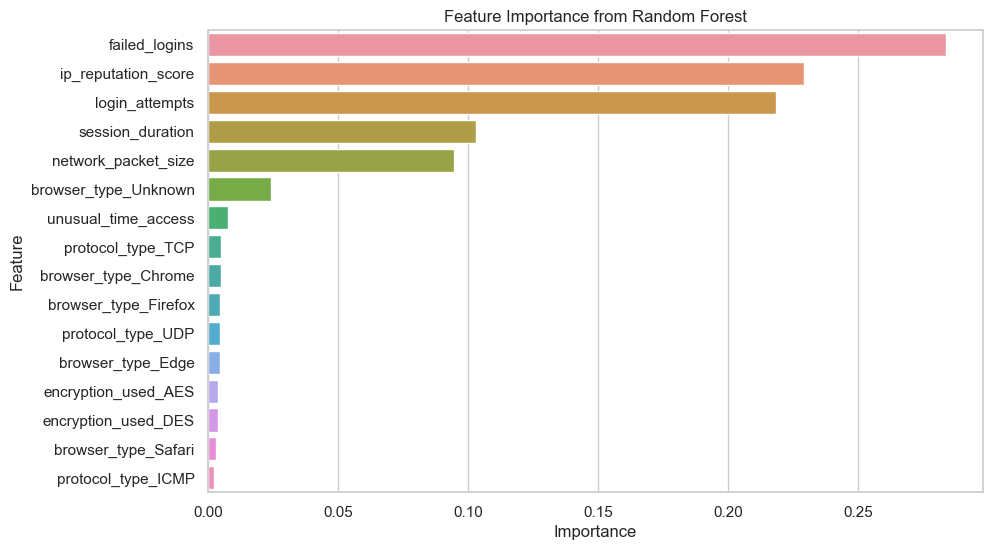

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Split into features and target
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

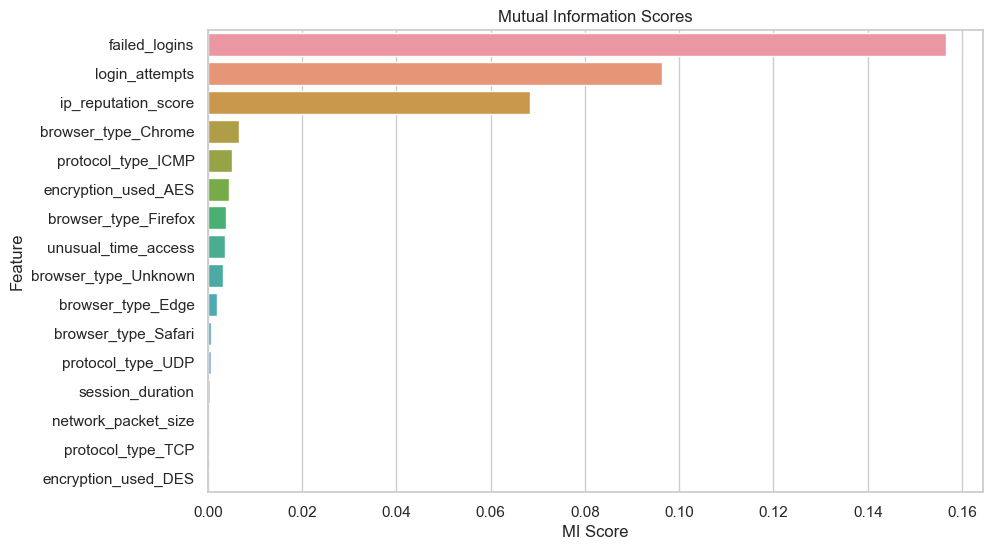

In [92]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi_scores = mutual_info_classif(df_encoded.drop('attack_detected', axis=1), df_encoded['attack_detected'])

# Create a DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': df_encoded.drop('attack_detected', axis=1).columns,
    'MI Score': mi_scores
})

# Sort by MI score
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Plot MI scores
plt.figure(figsize=(10, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_df)
plt.title('Mutual Information Scores')
plt.show()

### Chi-Square

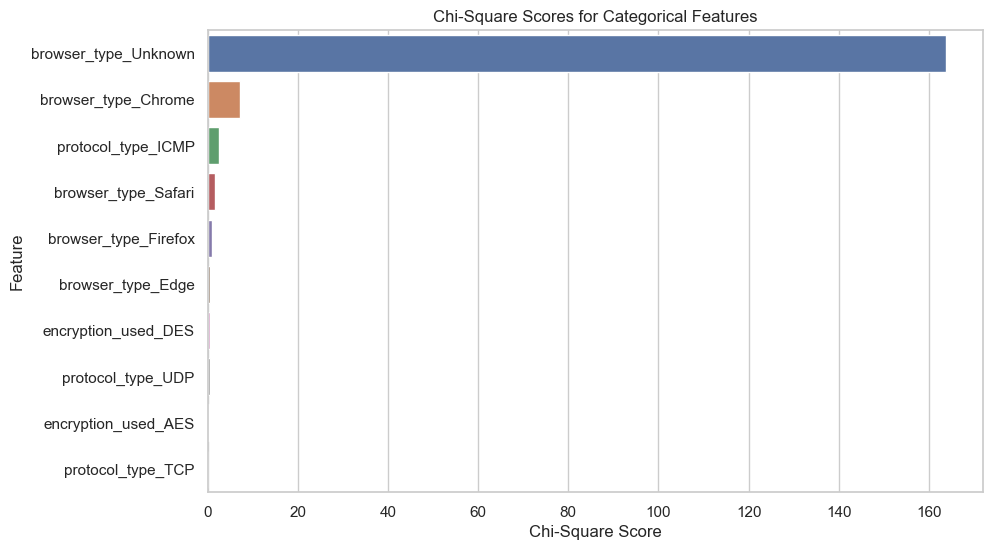

In [93]:
from sklearn.feature_selection import chi2

# Identify one-hot encoded categorical features
categorical_encoded_features = [col for col in df_encoded.columns if col.startswith(('protocol_type', 'encryption_used', 'browser_type'))]

# Perform Chi-Square test
chi_scores, p_values = chi2(df_encoded[categorical_encoded_features], df_encoded['attack_detected'])

# Create a DataFrame for visualization
chi_df = pd.DataFrame({
    'Feature': categorical_encoded_features,
    'Chi-Square Score': chi_scores,
    'P-Value': p_values
})

# Sort by Chi-Square score
chi_df = chi_df.sort_values(by='Chi-Square Score', ascending=False)

# Plot Chi-Square scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Square Score', y='Feature', data=chi_df)
plt.title('Chi-Square Scores for Categorical Features')
plt.show()

### Point-Biserial and ANOVA F-Test

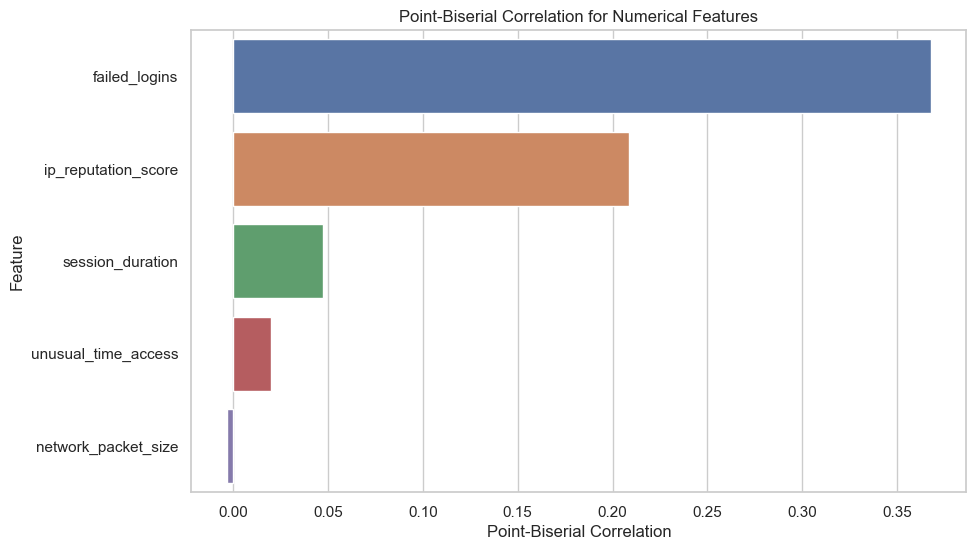

In [ ]:
from scipy.stats import pointbiserialr

# Select numerical features
numerical_features = ['network_packet_size', 'session_duration', 'ip_reputation_score', 'failed_logins', 'unusual_time_access']

# Compute Point-Biserial Correlation
pb_scores = [pointbiserialr(X_train[feature], y_train)[0] for feature in numerical_features]

# Create a DataFrame for visualization
pb_df = pd.DataFrame({
    'Feature': numerical_features,
    'Point-Biserial Correlation': pb_scores
})

# Sort by correlation
pb_df = pb_df.sort_values(by='Point-Biserial Correlation', ascending=False)

# Plot Point-Biserial Correlation
plt.figure(figsize=(10, 6))
sns.barplot(x='Point-Biserial Correlation', y='Feature', data=pb_df)
plt.title('Point-Biserial Correlation for Numerical Features')
plt.show()

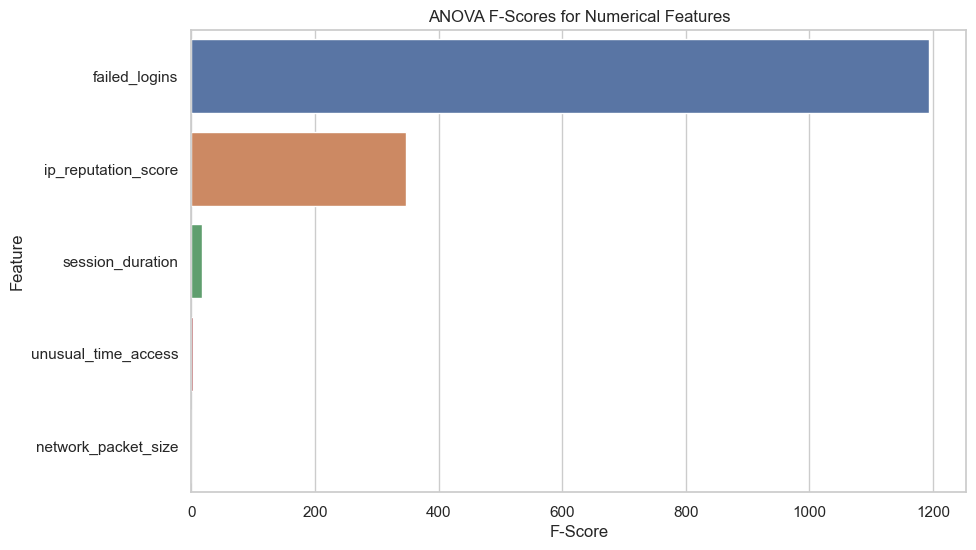

In [ ]:
from sklearn.feature_selection import f_classif

# Perform ANOVA F-Test
f_scores, p_values = f_classif(X_train[numerical_features], y_train)

# Create a DataFrame for visualization
anova_df = pd.DataFrame({
    'Feature': numerical_features,
    'F-Score': f_scores,
    'P-Value': p_values
})

# Sort by F-Score
anova_df = anova_df.sort_values(by='F-Score', ascending=False)

# Plot F-Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=anova_df)
plt.title('ANOVA F-Scores for Numerical Features')
plt.show()